In [1]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
daisy = 'flowers/daisy/*.jpg'
dandalion = 'flowers/dandelion/*.jpg'
rose = 'flowers/rose/*.jpg'
sunflower = 'flowers/sunflower/*.jpg'
tulip = 'flowers/tulip/*.jpg'

In [3]:
import glob
import os

def read_img(path, label):
    image_stack = []
    labels = []
    #name = str(path)
    for img in glob.glob(path):
        #f = img.find("/")+1
        
        labels.append(label)
        image = cv2.imread(img)
        img_res = cv2.resize(image, (128, 128), cv2.INTER_LINEAR)
        image_stack.append(img_res)
        #image_stack = np.asarray(image_stack)
    return (image_stack), labels


In [4]:
data = {0:'flowers/daisy/*.jpg', 1:'flowers/dandelion/*.jpg', 2:'flowers/rose/*.jpg', 
        3:'flowers/sunflower/*.jpg',4:'flowers/tulip/*.jpg' }
#targets = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

dataset = []
labels = []
for key, path in data.items():
    images, label = read_img(path, key)
    dataset += images
    labels += label
dataset = np.asarray(dataset)
labels = np.asarray(labels)

In [5]:
print('Dataset shape:',dataset.shape)
print('Labels shape:',labels.shape)

Dataset shape: (4323, 128, 128, 3)
Labels shape: (4323,)


In [6]:
target = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

In [7]:
from sklearn.model_selection import train_test_split
from random import *

In [8]:
X_tr, X_te, Y_tr, Y_te = train_test_split(dataset, labels, test_size = 0.1, random_state=0)

In [9]:
Y_tr.shape

(3890,)

In [10]:
import matplotlib.gridspec as gridspec
def plot_dataset(X, Y, target, samples):
    l = len(X)
    n = 0
    gs = gridspec.GridSpec(10, 6)
    plt.figure(figsize=(25, 30))
    for i in range(samples):
        ax = plt.subplot(gs[n])
        index = randint(1, l)
        image = X[index]
        label = target[Y[index]]
        n+=1
        plt.text(0, -2, label)
        plt.imshow(image)
    #plt.imshow()

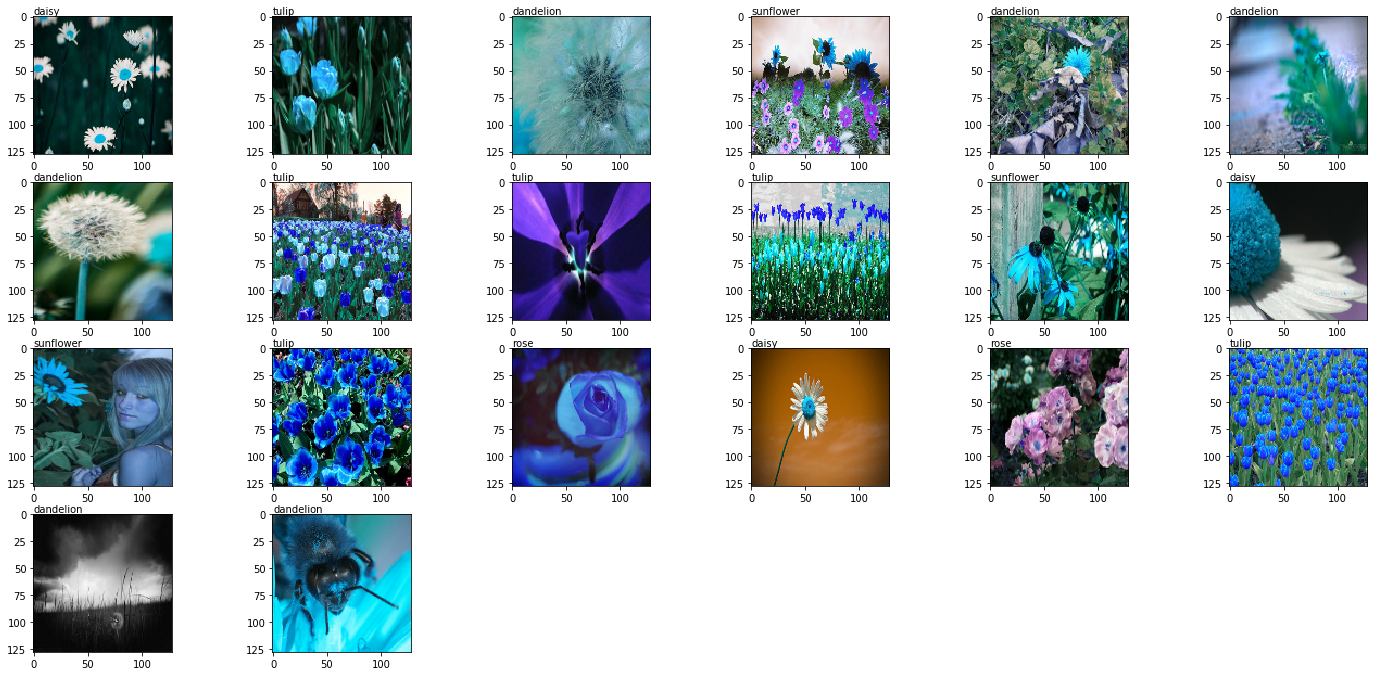

In [11]:
plot_dataset(X_tr, Y_tr, target, 20)

In [12]:
#Buiding my model

In [13]:
def w_var(shape):
    w = tf.truncated_normal(shape=shape, stddev=0.01)
    return tf.Variable(w)
def b_var(shape):
    b = tf.zeros(shape)
    return tf.Variable(b)
    

In [18]:
def CNN(x):
    filter_ = 3
    strides = [1, 1, 1, 1]
    ksize = [1, 2, 2, 1]
    strides2 = ksize
    
    # First Layer
    w1 = w_var(shape=[filter_, filter_, 3, 32])
    b1 = b_var([32])
    
    x = tf.nn.conv2d(x, w1, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b1)
    x = tf.nn.relu(x)
    
    # Second Layer
    
    w2 = w_var(shape=[filter_, filter_, 32, 32])
    b2 = b_var([32])
    
    x = tf.nn.conv2d(x, w2, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b2)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=ksize, strides=strides2, padding='VALID')
    
    # Third Layer
    w3 = w_var(shape=[filter_, filter_, 32, 64])
    b3 = b_var([64])
    
    x = tf.nn.conv2d(x, w3, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b3)
    x = tf.nn.relu(x)
    
    # Fourth Layer    
    w4 = w_var(shape=[filter_, filter_, 64, 128])
    b4 = b_var([128])
    
    x = tf.nn.conv2d(x, w4, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b4)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=ksize, strides=strides2, padding='VALID')
    
    # Flatten
    x = tf.contrib.layers.flatten(x)
    
    #Fully Connected Layer
    dim = x.get_shape().as_list()
    w_fc = w_var(shape=[dim[1], 256])
    b_fc = b_var([256])
    fc1 = tf.add(tf.matmul(x, w_fc), b_fc)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    w_fc2 = w_var(shape=[256, 5])
    b_fc2 = b_var([5])
    logits = tf.add(tf.matmul(fc1, w_fc2), b_fc2)
    
    
    return logits
        
    

In [19]:
tf.reset_default_graph()

learning_rate = 6e-4
feat = X_tr.shape[1]
n_labels = len(set(Y_tr))
channels = X_tr.shape[3]
x = tf.placeholder(dtype=tf.float32, shape=(None, feat, feat, channels))
y = tf.placeholder(dtype=tf.int32, shape=(None))
y_hot = tf.one_hot(y, n_labels)
keep_prob = tf.placeholder(dtype=tf.float32)

In [20]:
logits = CNN(x)
softmax = tf.nn.softmax(logits)
step = tf.Variable(0, trainable=False)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_hot))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.9, 
                                       beta2=0.99, name='optimizer').minimize(loss, global_step=step)

prediction = tf.equal(tf.argmax(softmax, 1), tf.argmax(y_hot, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, dtype=tf.float32))

Initializing Training
TEST RESULTS EPOCH 0
Test Loss: 1.254920 and Test Accuracy: 44.341803 
 
TEST RESULTS EPOCH 1
Test Loss: 1.100724 and Test Accuracy: 53.348726 
 
TEST RESULTS EPOCH 2
Test Loss: 1.070284 and Test Accuracy: 59.122401 
 
TEST RESULTS EPOCH 3
Test Loss: 0.999609 and Test Accuracy: 62.586606 
 
TEST RESULTS EPOCH 4
Test Loss: 1.022664 and Test Accuracy: 58.660507 
 
TEST RESULTS EPOCH 5
Test Loss: 0.936790 and Test Accuracy: 64.665121 
 
TEST RESULTS EPOCH 6
Test Loss: 1.165056 and Test Accuracy: 64.203238 
 
TEST RESULTS EPOCH 7
Test Loss: 1.219796 and Test Accuracy: 65.357965 
 
TEST RESULTS EPOCH 8
Test Loss: 1.398087 and Test Accuracy: 65.819860 
 
TEST RESULTS EPOCH 9
Test Loss: 1.766522 and Test Accuracy: 61.893761 
 
TEST RESULTS EPOCH 10
Test Loss: 1.976919 and Test Accuracy: 64.665127 
 
TEST RESULTS EPOCH 11
Test Loss: 2.139277 and Test Accuracy: 64.434183 
 
TEST RESULTS EPOCH 12
Test Loss: 2.601275 and Test Accuracy: 61.200923 
 
TEST RESULTS EPOCH 13
Test

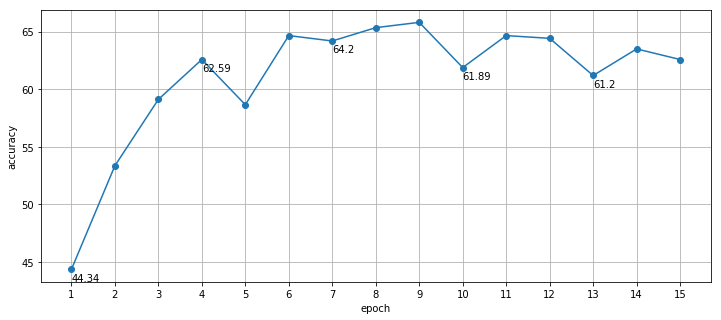

In [21]:

acc_map = []

from sklearn.utils import shuffle
batch_size = 32
epochs = 15
samples = len(X_tr)

count = 0
print("Initializing Training")
try:
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for epoch in range(epochs):
            X_tr, Y_tr = shuffle(X_tr, Y_tr)
            for offset in range(0, samples, batch_size):
                end = offset+batch_size
                xs_batch, ys_batch = X_tr[offset:end], Y_tr[offset:end]
                loss_, _ = sess.run([loss, optimizer], feed_dict={x: xs_batch, 
                                                                  y: ys_batch,
                                                                  keep_prob:0.5})    

            loss_test, acc_test  = sess.run([loss, accuracy], feed_dict={x: X_te,
                                                                             y: Y_te,
                                                                             keep_prob:1.0
                                                                            })
            print('TEST RESULTS EPOCH', epoch)
            print("Test Loss: %f and Test Accuracy: %f "%(loss_test, acc_test * 100))
            print(" ")  
            
            acc_map.append(round((acc_test)*100, 2))
            #print("EPOCH {}".format(epoch + 1))
            #print ("Validation Loss = {} and Validation Accuracy = {} %".format(validation_loss, 100 *validation_acc))
        plt.figure(figsize=(12, 5))
        plt.xticks(range(1, epochs+1))
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid(True)
        plt.plot(range(1, epochs+1), acc_map, '-o')
        for i, j in list(zip(range(1, epochs+1), acc_map))[0::3]:
            plt.text(i, j-1, str(j))
        #test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: xs_batch, 
                                                                    #y: ys_batch,
                                                                    #keep_prob:1.0})  
        print ("Test Loss {} and Test Accuracy {:.3f} %".format(loss_test, 100 *acc_test))
except KeyboardInterrupt:
    print('Training interrupted')